In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## RL Data Analysis

### rl_data.csv

1. **subject_id:** Unique identifier for each participant.
   
2. **block_order:** Indicates the order in which the blocks of the experiment were presented to the participant.

3. **block_condition:** Represents the condition of the block (category-predictive or exemplar-predictive).

4. **trial:** Unique identifier for each trial, distinguishing individual instances throughout the experiment.

5. **cat_number:** Indicates the category number of the stimulus presented in the trial.

6. **stim_number:** Represents the specific stimulus number within a category for each trial.

7. **approach_reward:** The reward associated with choosing to "approach" the stimulus. This value influences the reinforcement learning process.

8. **choice:** Indicates whether the participant chose to "approach" (1) or "avoid" (2) the stimulus, reflecting their decision-making during the trial.

9. **points:** The points earned or lost based on the participant's choice and the associated reward. This contributes to the reinforcement aspect of the learning task.


In [21]:
# Loading RL data
rl_data = pd.read_csv('/home/sruj/Downloads/e1_rl_data.csv', delimiter='\t')

# Display descriptive statistics
rl_data.describe()

       subject_id,block_order,block_condition,trial,cat_number,stim_number,approach_reward,choice,points
count                                               45702                                               
unique                                              45702                                               
top                                 3768,1,2,1,3,15,2,1,2                                               
freq                                                    1                                               


### Trial Distribution

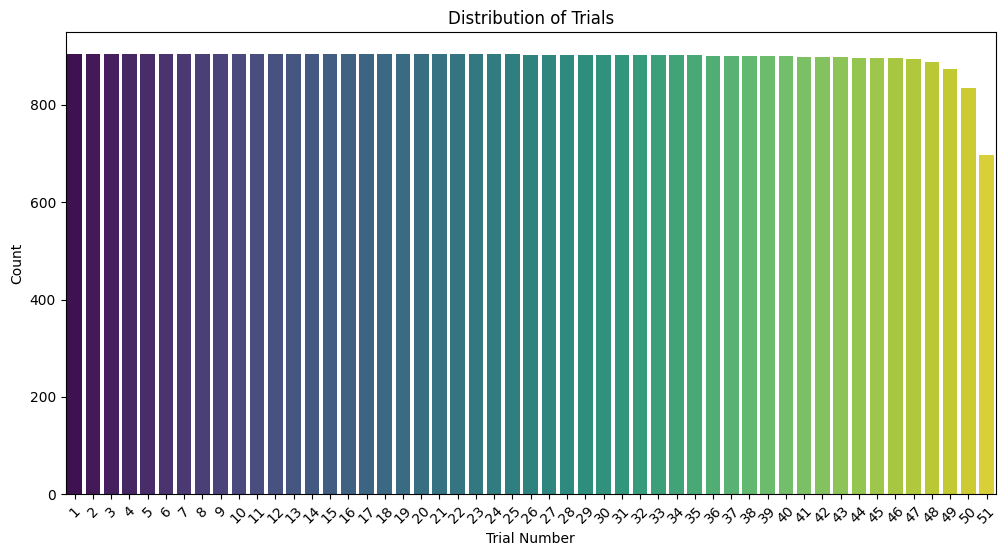

In [22]:
# Splitting the string into separate columns
rl_data = rl_data['subject_id,block_order,block_condition,trial,cat_number,stim_number,approach_reward,choice,points'].str.split(',', expand=True)

rl_data.columns = ['subject_id', 'block_order', 'block_condition', 'trial', 'cat_number', 'stim_number', 'approach_reward', 'choice', 'points']

plt.figure(figsize=(12, 6))

sns.countplot(x='trial', data=rl_data, palette='viridis')  
plt.title('Distribution of Trials')
plt.xlabel('Trial Number')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### The distribution of trials plot provides insights into the frequency of different trial numbers throughout the experiment. In the context of the experiment, where participants engage in a reinforcement-learning task, this plot helps to understand the temporal progression of the trials and their occurrence.


### Distribution of rewards

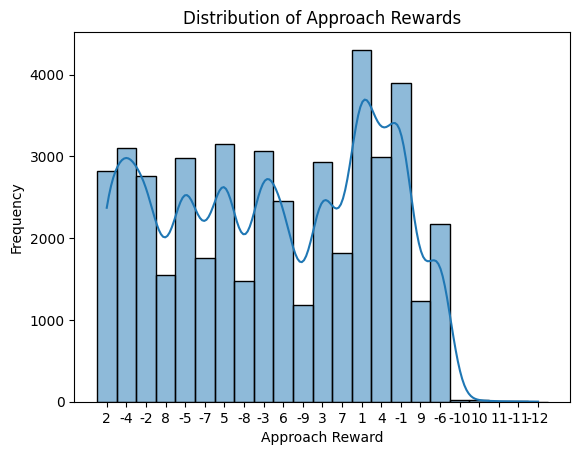

In [23]:
# Plot of distribution of rewards
sns.histplot(x='approach_reward', data=rl_data, bins=20, kde=True)
plt.title('Distribution of Approach Rewards')
plt.xlabel('Approach Reward')
plt.ylabel('Frequency')
plt.show()

#### The plot illustrates the spread and frequency of rewards obtained by participants during the reinforcement-learning task.

The high frequency of rewards at 1 and -1 suggests that these values were prevalent during the task. This could indicate that participants frequently made decisions that led to either positive or negative outcomes, possibly reflecting a clear distinction in the reinforcement structure.

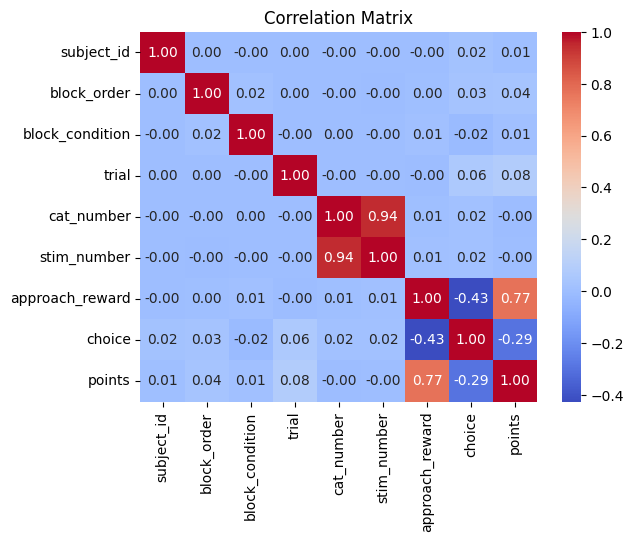

In [7]:
# Create correlation matrix
correlation_matrix = rl_data.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### The correlation matrix reveals how different variables in the dataset relate to each other. High correlations along the diagonal suggest strong relationships between variables and themselves.

The correlation values between approach_reward and points highlight their positive association, indicating that higher rewards align with more accumulated points. Conversely, lower correlations for choice with both approach_reward and points suggest a weaker relationship.